# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"D:\Sambita\Training\others\BSE\Gathering and pre-processing\Employee data1.xlsx")

In [ ]:
df['id'].iloc[100]

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df = df.rename(columns ={'educ':'education'})

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.iloc[-5:-1,0:3]
df.iloc[1,2]

In [ ]:
df.loc[5:20,['gender','bdate']]

In [ ]:
df

In [ ]:
df.jobcat1.unique()

In [ ]:
df.minority.value_counts(dropna =False)

In [ ]:
df.isnull().sum()

# Auto EDA Libraries

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

In [ ]:
df1 = sv.compare(df[100:], df[:100])
df1.show_html('Compare.html')

# Auto visualization library

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [ ]:
df1 = AV.AutoViz(r"D:\Sambita\Training\others\BSE\Gathering and pre-processing\Employee data1.xlsx",verbose=2)


In [ ]:
type(df1)

# Visualization 

In [2]:
df.head(30).style.background_gradient(subset=['salary', 'salbegin'], cmap='BuGn')

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,jobcat1
0,1,m,1952-02-03 00:00:00,15,3,57000.000000,27000,98.000000,144.000000,0.000000,Manager
1,2,m,1958-05-23 00:00:00,16,1,40200.000000,18750,98.000000,36.000000,0.000000,Developer
2,3,f,1929-07-26 00:00:00,12,1,21450.000000,12000,98.000000,381.000000,0.000000,Developer
3,4,f,1947-04-15 00:00:00,8,1,21900.000000,13200,98.000000,190.000000,0.000000,Developer
4,5,m,1955-02-09 00:00:00,15,1,45000.000000,21000,98.000000,138.000000,0.000000,Developer
5,6,m,1958-08-22 00:00:00,15,1,32100.000000,13500,98.000000,67.000000,0.000000,Developer
6,7,m,1956-04-26 00:00:00,15,1,36000.000000,18750,98.000000,114.000000,0.000000,Developer
7,8,f,1966-05-06 00:00:00,12,1,21900.000000,9750,98.000000,0.000000,0.000000,Developer
8,9,f,1946-01-23 00:00:00,15,1,27900.000000,12750,98.000000,115.000000,0.000000,Developer
9,10,f,1946-02-13 00:00:00,12,1,24000.000000,13500,98.000000,244.000000,0.000000,Developer


In [3]:
df.style.highlight_max(color ='blue').highlight_min(color='yellow').background_gradient(subset='prevexp')

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,jobcat1
0,1,m,1952-02-03 00:00:00,15,3,57000.000000,27000,98.000000,144.000000,0.000000,Manager
1,2,m,1958-05-23 00:00:00,16,1,40200.000000,18750,98.000000,36.000000,0.000000,Developer
2,3,f,1929-07-26 00:00:00,12,1,21450.000000,12000,98.000000,381.000000,0.000000,Developer
3,4,f,1947-04-15 00:00:00,8,1,21900.000000,13200,98.000000,190.000000,0.000000,Developer
4,5,m,1955-02-09 00:00:00,15,1,45000.000000,21000,98.000000,138.000000,0.000000,Developer
5,6,m,1958-08-22 00:00:00,15,1,32100.000000,13500,98.000000,67.000000,0.000000,Developer
6,7,m,1956-04-26 00:00:00,15,1,36000.000000,18750,98.000000,114.000000,0.000000,Developer
7,8,f,1966-05-06 00:00:00,12,1,21900.000000,9750,98.000000,0.000000,0.000000,Developer
8,9,f,1946-01-23 00:00:00,15,1,27900.000000,12750,98.000000,115.000000,0.000000,Developer
9,10,f,1946-02-13 00:00:00,12,1,24000.000000,13500,98.000000,244.000000,0.000000,Developer


<BarContainer object of 474 artists>

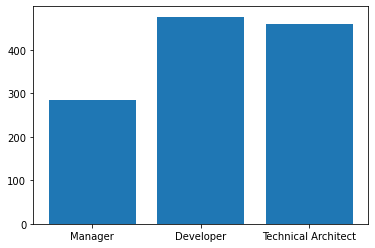

In [4]:
import matplotlib.pyplot as plt
plt.bar(df['jobcat1'],df['prevexp']) 

<BarContainer object of 474 artists>

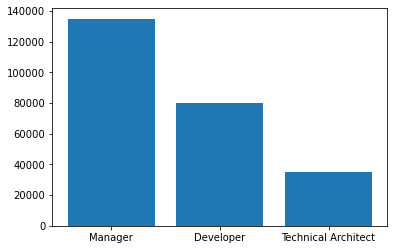

In [5]:
plt.bar(df['jobcat1'],df['salary']) 

<BarContainer object of 474 artists>

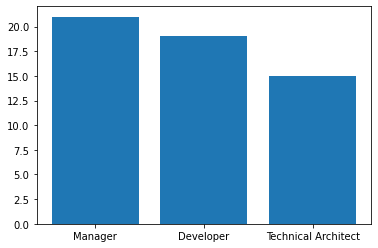

In [9]:
plt.bar(df['jobcat1'],df['education']) 

In [10]:
df['year'] = pd.DatetimeIndex(df['bdate']).year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         474 non-null    int64         
 1   gender     474 non-null    object        
 2   bdate      473 non-null    datetime64[ns]
 3   education  474 non-null    int64         
 4   jobcat     474 non-null    int64         
 5   salary     473 non-null    float64       
 6   salbegin   474 non-null    int64         
 7   jobtime    473 non-null    float64       
 8   prevexp    472 non-null    float64       
 9   minority   471 non-null    float64       
 10  jobcat1    474 non-null    object        
 11  year       473 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 44.6+ KB


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='salary'>

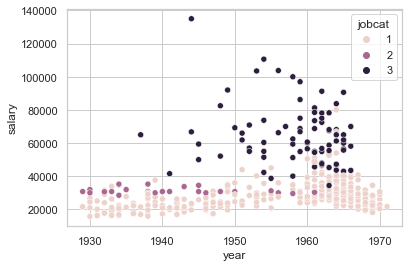

In [12]:
sns.set(style='whitegrid')
sns.scatterplot(x=df["year"],
                    y=df["salary"],hue=df.jobcat)

<AxesSubplot:>

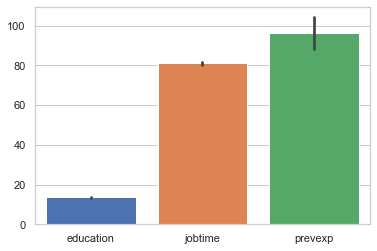

In [13]:
sns.barplot(data =df[['education', 'jobtime', 'prevexp']], saturation=1, ci= 90
           )

<AxesSubplot:xlabel='year', ylabel='salary'>

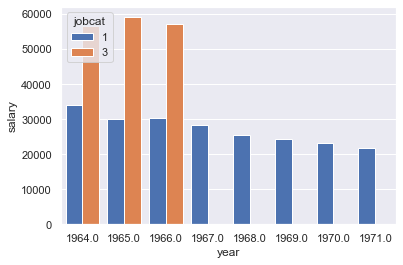

In [14]:
sns.set_style("darkgrid")
x1=df[df["year"] >= 1964]
sns.barplot(x=x1["year"], y=x1["salary"],saturation=1,hue = x1["jobcat"],ci= None)

<AxesSubplot:xlabel='salary', ylabel='Count'>

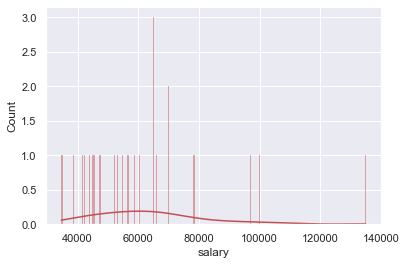

In [18]:
 sns.histplot(df[df["salbegin"] >=20000]["salary"],label="Starting Salary",bins=1000,  color="r",kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

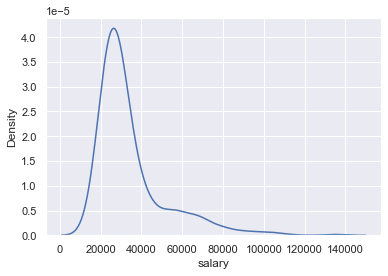

In [19]:
sns.kdeplot(df.salary)

C:\Users\cyber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

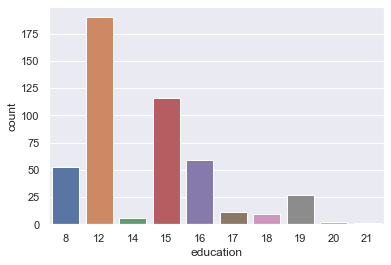

In [20]:
sns.countplot(df["education"])

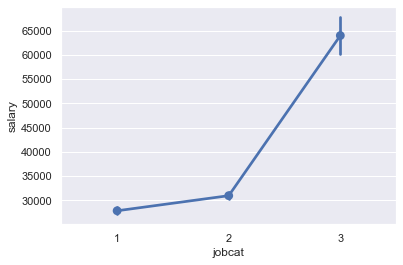

In [21]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x=df["jobcat"], y=df["salary"])

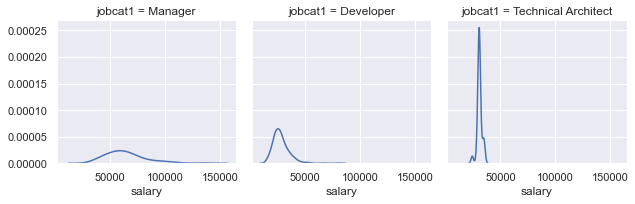

In [22]:
import seaborn as sns
g = sns.FacetGrid(df, col='jobcat1')
g = g.map(sns.kdeplot, 'salary')

In [ ]:
df.columns

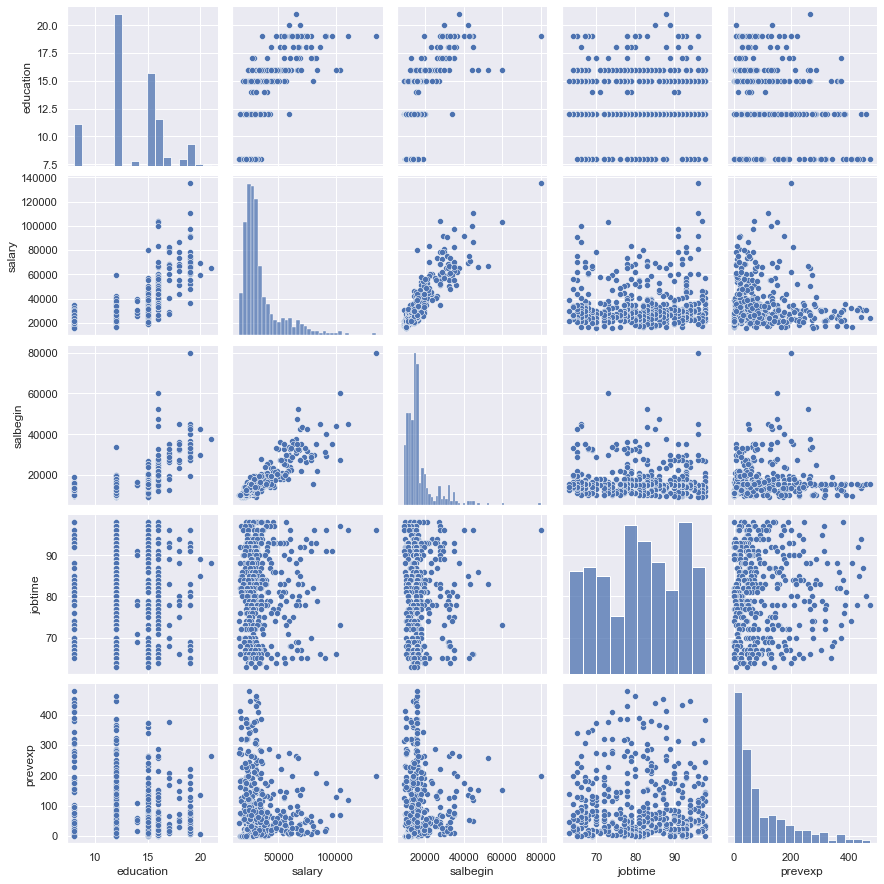

In [23]:
sns.pairplot(df[['education','salary','salbegin', 'jobtime', 'prevexp']])

<AxesSubplot:>

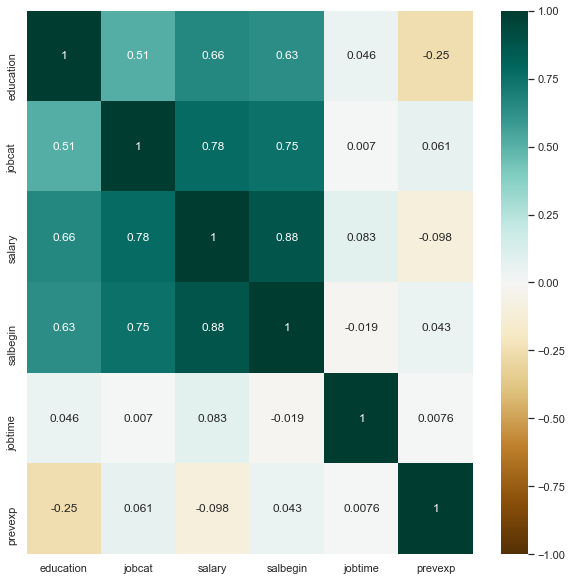

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['education', 'jobcat', 'salary', 'salbegin',
       'jobtime', 'prevexp']].corr(),annot =True,vmax=1,vmin=-1,cmap="BrBG")
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html --cpolor references